In [1]:
#Load needed packages

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
#Set option to view all columns

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
#Load in the data

In [6]:
df = pd.read_csv(r"C:\Users\Micha\OneDrive\Python tutorial\Pandas\Portfolio Projects\Superstore\Sample - Superstore.csv",encoding = 'latin1')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
#Drop row_id column as it is not needed

In [9]:
df = df.drop(columns = 'Row ID')

In [10]:
#Check data types

In [11]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [12]:
#Order date and ship date will be changed to date/time format

In [13]:
def convert_to_datetime(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column])
    return df

df = convert_to_datetime(df, ['Order Date', 'Ship Date'])

In [14]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [15]:
#look for duplicates

In [16]:
df.duplicated().sum()

1

In [17]:
#Since there is only one duplicated row we will get it of it from the dataset

In [18]:
df = df.loc[~df.duplicated()]

In [19]:
#look for nulls

In [20]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [21]:
#Basic statistics

In [22]:
df.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,2016-04-30 01:53:33.089162240,2016-05-04 00:53:19.039327488,55191.576403,229.852846,3.789753,0.156188,28.660971
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32065.074478,623.276074,2.225149,0.206457,234.271476


<Axes: xlabel='Category', ylabel='Profit'>

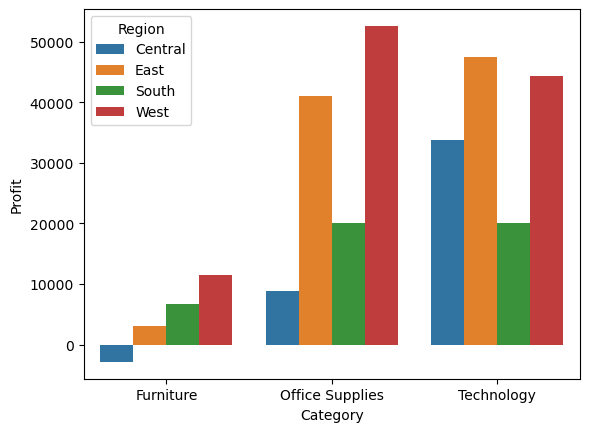

In [23]:
sns.barplot(data = (df.groupby(['Category','Region'],as_index=False)['Profit'].sum()),x='Category',y='Profit',hue='Region')

In [24]:
#add a column for shipping time from the time of the order was placed

In [25]:
df['Ship Time']=df['Ship Date']-df['Order Date']

In [26]:
#Furniture is the least profitable, stores in Central US are creating a negative profit

In [27]:
#There looks like some stores are taking a major loss in profit based on the data which should be woth exploring.
#Begin by looking at profits by state

In [28]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,4 days


In [29]:
df.groupby('State',as_index=False)['Profit'].sum().sort_values(by='Profit', ascending = True).head(15)

,State,Profit
41,Texas,-25729.3563
33,Ohio,-16959.3178
36,Pennsylvania,-15559.9603
11,Illinois,-12607.8870
31,North Carolina,-7490.9122
4,Colorado,-6527.8579
40,Tennessee,-5341.6936
1,Arizona,-3427.9246
8,Florida,-3399.3017
35,Oregon,-1190.4705


In [30]:
#Texas is the least performing store.  We can begin with looking at texas and the products being sold.

In [31]:
texas = df.loc[df['State']=='Texas']
texas.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time
14,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,4 days
15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160,4 days
34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,4 days
35,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,2 days
36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630,2 days


In [32]:
texas['Category'].value_counts()

Category
Office Supplies    604
Furniture          202
Technology         179
Name: count, dtype: int64

In [33]:
texas['Sub-Category'].value_counts()

Sub-Category
Binders        153
Paper          147
Storage         83
Furnishings     81
Accessories     81
Phones          80
Art             71
Chairs          61
Appliances      47
Tables          33
Envelopes       30
Labels          30
Bookcases       27
Fasteners       24
Supplies        19
Machines        13
Copiers          5
Name: count, dtype: int64

In [34]:
#Look at categories and sub categories to see where profits are being lost

In [35]:
pd.DataFrame(texas.groupby(['Category','Sub-Category'],)['Profit'].sum()).sort_values(by = ['Category','Profit'])

Profit
Category        Sub-Category            
Furniture       Furnishings   -3312.6786
                Chairs        -2515.6490
                Bookcases     -2391.1377
                Tables        -2216.6766
Office Supplies Binders      -14705.0738
                Appliances    -6147.2225
                Supplies       -837.2795
                Storage        -763.7054
                Fasteners        80.7357
                Labels          200.4020
                Art             316.3538
                Envelopes       848.1760
                Paper          2422.9703
Technology      Machines      -2666.8434
                Accessories    1105.8501
                Copiers        1629.9615
                Phones         3222.4608

In [36]:
#It's clear to see they are taking major hits on their Office Supplies (and Furniture)

In [37]:
pd.DataFrame(texas.groupby('Category',as_index=False)['Profit'].sum()).sort_values(by='Profit')

,Category,Profit
1,Office Supplies,-18584.6434
0,Furniture,-10436.1419
2,Technology,3291.4290


In [38]:
#Check cities selling office supplies

In [39]:
texas_office = texas.query('Category == "Office Supplies"')
pd.DataFrame(texas_office.groupby('City')['Profit'].sum()).sort_values(by = ['Profit'])

,Profit
City,
Houston,-8108.9256
San Antonio,-5689.9195
Dallas,-1504.6771
Round Rock,-782.5200
Carrollton,-550.8026
Waco,-428.3448
Tyler,-406.9667
Huntsville,-214.8972
Mcallen,-185.9733


In [40]:
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days


In [41]:
texas.groupby('Product Name',as_index=False)['Profit'].sum().sort_values(by = 'Profit')

,Product Name,Profit
259,GBC DocuBind P400 Electric Binding System,-5552.8392
241,Fellowes PB500 Electric Punch Plastic Comb Bin...,-2287.7820
399,Lexmark MX611dhe Monochrome Laser Printer,-1869.9890
260,GBC DocuBind TL300 Electric Binding System,-1480.0335
8,3.6 Cubic Foot Counter Height Office Refrigerator,-1378.8216
...,...,...
380,Jawbone JAMBOX Wireless Bluetooth Speaker,265.4232
146,Canon PC-428 Personal Copier,269.9865
129,Bose SoundLink Bluetooth Speaker,376.1100
147,Canon PC1080F Personal Copier,569.9905


In [42]:
texas_pie = texas.groupby(['Category'],as_index=False)[['Profit','Sales']].sum()

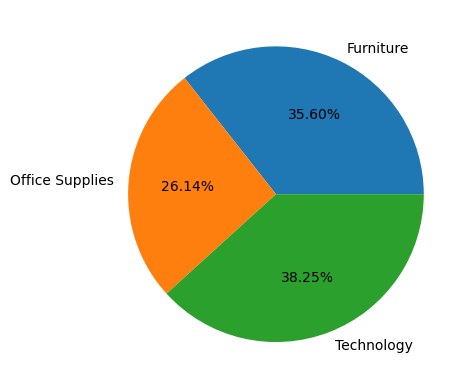

In [43]:
plt.pie(texas_pie['Sales'], labels = texas_pie['Category'],autopct='%1.2f%%')
plt.show()

In [44]:
#Texas is taking a huge loss on office supplies and furninture and it is nearly 62% of their sales

In [45]:
#Looking at sales over time for office supplied and furniture

In [46]:
#Filter by Office Supplies

In [47]:
t_office = texas.loc[texas['Category']=='Office Supplies']
t_office

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time
14,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,4 days
15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160,4 days
34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,4 days
37,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,Central,OFF-EN-10002986,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.328,9,0.2,35.4150,4 days
75,US-2017-118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,Texas,77041,Central,OFF-BI-10004182,Office Supplies,Binders,Economy Binders,1.248,3,0.8,-1.9344,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,CA-2014-133963,2014-05-18,2014-05-22,Second Class,GA-14515,George Ashbrook,Consumer,United States,Dallas,Texas,75220,Central,OFF-PA-10001526,Office Supplies,Paper,Xerox 1949,3.984,1,0.2,1.4442,4 days
9835,CA-2016-126627,2016-10-10,2016-10-12,First Class,WB-21850,William Brown,Consumer,United States,La Porte,Texas,77571,Central,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",16.392,2,0.8,-26.2272,2 days
9920,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,Texas,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.386,7,0.8,-35.8176,4 days
9961,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,OFF-PA-10000675,Office Supplies,Paper,Xerox 1919,65.584,2,0.2,23.7742,3 days


In [48]:
#Look at office supplies over time

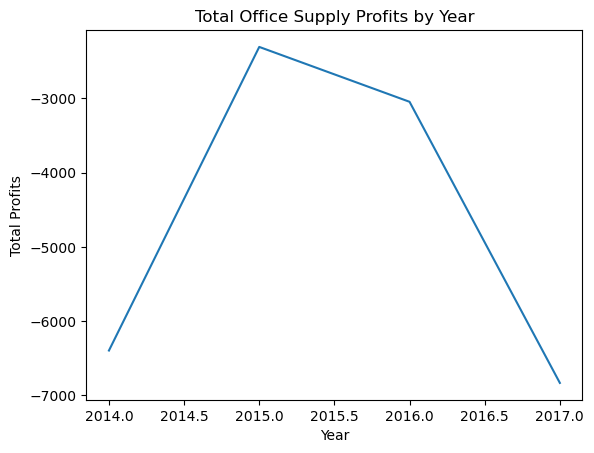

In [95]:
sns.lineplot(data = (t_office.groupby(t_office['Order Date'].dt.year)['Profit'].sum().reset_index()),x='Order Date',y='Profit')
plt.xlabel('Year')
plt.ylabel('Total Profits')
plt.title('Total Office Supply Profits by Year')
plt.show()

In [50]:
df.groupby(['Category','Product Name'],as_index=False)['Product Name'].size().sort_values(by = 'size',ascending = False).head(10)

,Category,Product Name,size
1144,Office Supplies,Staple envelope,48
1149,Office Supplies,Staples,46
722,Office Supplies,Easy-staple paper,46
585,Office Supplies,Avery Non-Stick Binders,20
1150,Office Supplies,Staples in misc. colors,19
257,Furniture,KI Adjustable-Height Table,18
1147,Office Supplies,Staple remover,18
1158,Office Supplies,Storex Dura Pro Binders,17
355,Furniture,Staple-based wall hangings,16
351,Furniture,"Situations Contoured Folding Chairs, 4/Set",15


In [51]:
texas.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time
14,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,4 days
15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160,4 days
34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,4 days
35,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,2 days
36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630,2 days


In [52]:
#See if ship time is a factor for texas

In [53]:
df['Ship Time'] = df['Ship Time'].astype('str')
df['Ship Time'] = df['Ship Time'].str.strip('days')
df['Ship Time'] = df['Ship Time'].astype('int')

In [54]:
texas_ship = df.loc[df['State']=='Texas']
texas_ship = texas_ship.groupby('Ship Mode',as_index=False)['Ship Time'].mean()
texas_ship

,Ship Mode,Ship Time
0,First Class,2.277778
1,Same Day,0.083333
2,Second Class,3.073298
3,Standard Class,4.906977


In [55]:
all_ship = df.groupby('Ship Mode',as_index=False)['Ship Time'].mean()
all_ship

,Ship Mode,Ship Time
0,First Class,2.182705
1,Same Day,0.044199
2,Second Class,3.238046
3,Standard Class,5.006704


In [56]:
all_ship['Region'] = 'All States'

In [57]:
texas_ship['Region'] = 'Texas'

In [58]:
all_ship = pd.concat([all_ship,texas_ship])
all_ship

,Ship Mode,Ship Time,Region
0,First Class,2.182705,All States
1,Same Day,0.044199,All States
2,Second Class,3.238046,All States
3,Standard Class,5.006704,All States
0,First Class,2.277778,Texas
1,Same Day,0.083333,Texas
2,Second Class,3.073298,Texas
3,Standard Class,4.906977,Texas


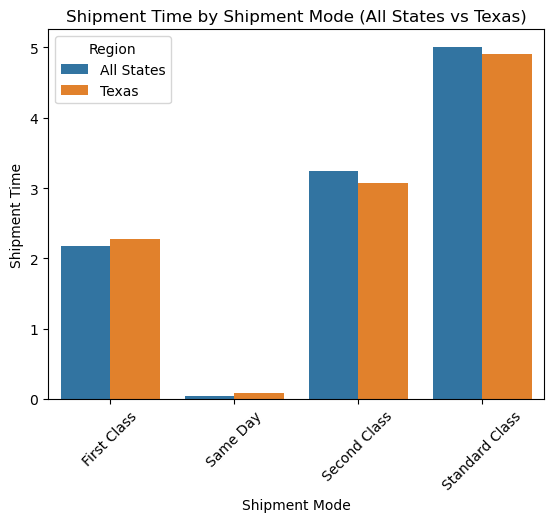

In [97]:
sns.barplot(data = all_ship,x='Ship Mode',y='Ship Time',hue='Region')
plt.title('Shipment Time by Shipment Mode (All States vs Texas)')
plt.xlabel('Shipment Mode')
plt.ylabel('Shipment Time')
plt.xticks(rotation=45)
plt.show()

In [60]:
#Is there a correlation between ship mode and profit?

In [61]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


In [62]:
df['Ship Mode Code'] = df['Ship Mode'].astype('category')

In [63]:
df['Ship Mode Code'] = df['Ship Mode Code'].cat.codes

<Axes: >

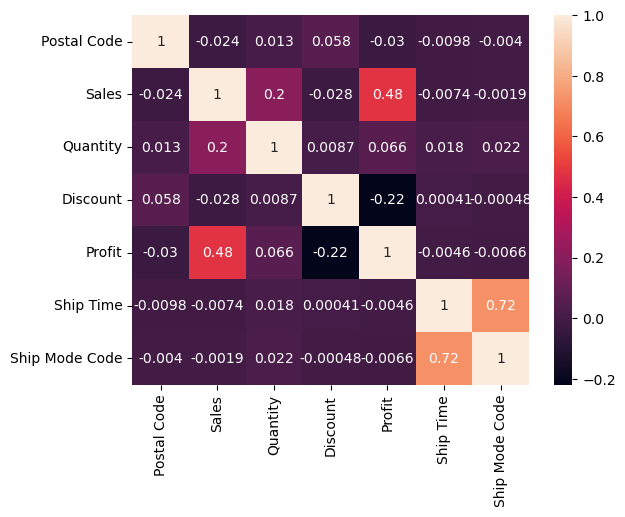

In [64]:
sns.heatmap(df.corr(numeric_only = True),annot=True)

In [65]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Time,Ship Mode Code
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,2
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,2
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,2
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,3
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,3


In [66]:
#Look at average quantity, discount, and profit compared to the country

In [67]:
texas_discounts = texas.groupby('Category')[['Quantity','Discount','Profit']].mean().reset_index()
texas_discounts['Region'] = 'Texas'
texas_discounts

,Category,Quantity,Discount,Profit,Region
0,Furniture,3.792079,0.422970,-51.664069,Texas
1,Office Supplies,3.806291,0.398675,-30.769277,Texas
2,Technology,3.681564,0.214525,18.387872,Texas


In [68]:
all_discounts = df.groupby('Category')[['Quantity','Discount','Profit']].mean().reset_index()
all_discounts['Region'] = 'All States'
all_discounts

,Category,Quantity,Discount,Profit,Region
0,Furniture,3.785849,0.173863,8.709119,All States
1,Office Supplies,3.801195,0.157285,20.327050,All States
2,Technology,3.756903,0.132323,78.752002,All States


In [69]:
all_texas_disc = pd.concat([texas_discounts,all_discounts])
all_texas_disc

,Category,Quantity,Discount,Profit,Region
0,Furniture,3.792079,0.422970,-51.664069,Texas
1,Office Supplies,3.806291,0.398675,-30.769277,Texas
2,Technology,3.681564,0.214525,18.387872,Texas
0,Furniture,3.785849,0.173863,8.709119,All States
1,Office Supplies,3.801195,0.157285,20.327050,All States
2,Technology,3.756903,0.132323,78.752002,All States


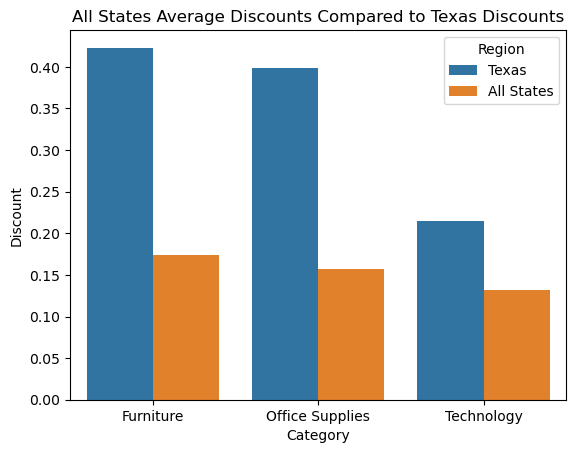

In [70]:
sns.barplot(data = all_texas_disc,x='Category',y='Discount',hue = 'Region')
plt.xlabel('Category')
plt.ylabel('Discount')
plt.title('All States Average Discounts Compared to Texas Discounts')
plt.show()

In [86]:
sales_year = texas.groupby(texas['Order Date'].dt.year)['Sales'].sum().reset_index()


<Axes: xlabel='Order Date'>

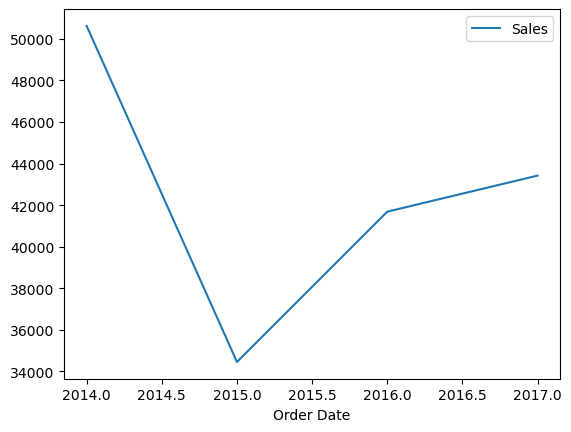

In [87]:
sales_year.plot(kind='line',x='Order Date',y='Sales')

In [88]:
discount_year = texas.groupby(texas['Order Date'].dt.year)['Discount'].mean().reset_index()

<Axes: xlabel='Order Date'>

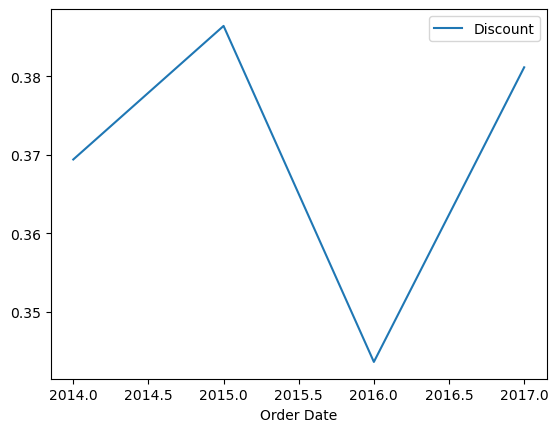

In [90]:
discount_year.plot(kind='line',x='Order Date',y='Discount')